## Sign Language Recognition

### by Juan Saracho

In [27]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [33]:
df = pd.read_csv(r'C:\Users\sarac\OneDrive\Documents\ANA500\wk4\sign_mnist_train.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [69]:
def load_data(path):
	df = pd.read_csv(path)
	y = np.array([label if label < 9
				else label-1 for label in df['label']])
	df = df.drop('label', axis=1)
	x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
				for i in range(len(df))]).astype(float)
	x = np.expand_dims(x, axis=3)
	y = pd.get_dummies(y).values

	return x, y

X_train, Y_train = load_data(r'C:\Users\sarac\OneDrive\Documents\ANA500\wk4\sign_mnist_train.csv')
X_test, Y_test = load_data(r'C:\Users\sarac\OneDrive\Documents\ANA500\wk4\sign_mnist_test.csv')


In [70]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


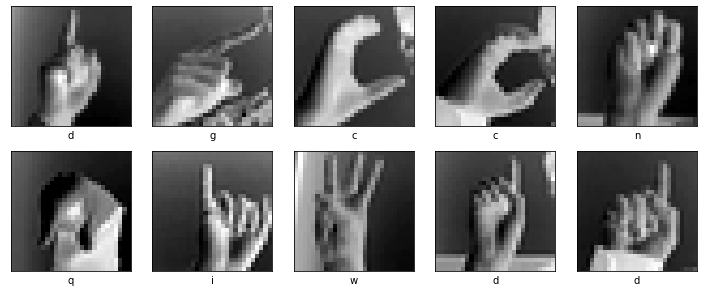

In [71]:
class_names = list(string.ascii_lowercase[:26].replace(
	'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
	plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()


In [89]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=32,
						kernel_size=(3, 3),
						activation='relu',
						input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=64,
						kernel_size=(3, 3),
						activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(256, activation='relu'),
	tf.keras.layers.Dropout(0.3),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(24, activation='softmax')
])


In [90]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 1600)            

In [92]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)


In [93]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 5)


Epoch 1/5
2746/2746 [==============================] - 53s 18ms/step - loss: 0.5874 - accuracy: 0.8154
Epoch 2/5
2746/2746 [==============================] - 50s 18ms/step - loss: 0.3241 - accuracy: 0.8949
Epoch 3/5
2746/2746 [==============================] - 50s 18ms/step - loss: 0.3073 - accuracy: 0.9000
Epoch 4/5
2746/2746 [==============================] - 50s 18ms/step - loss: 0.1272 - accuracy: 0.9577
Epoch 5/5
2746/2746 [==============================] - 50s 18ms/step - loss: 0.1170 - accuracy: 0.9619


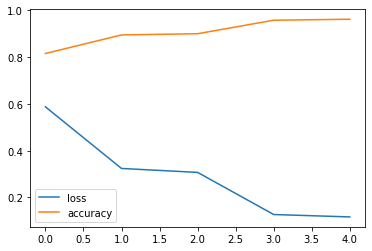

In [94]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','accuracy']].plot()
#history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()
